In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Sharpening using smooth filters




> We've seen that smooth filters are used to blur and remove info from the image.
<br>
In this part your task is to do the opposite ! Use them to actually make the image sharper



- hint: $$
g_{\text{sharp}} = f + \gamma \left( f - h_{\text{blur}} * f \right)
$$



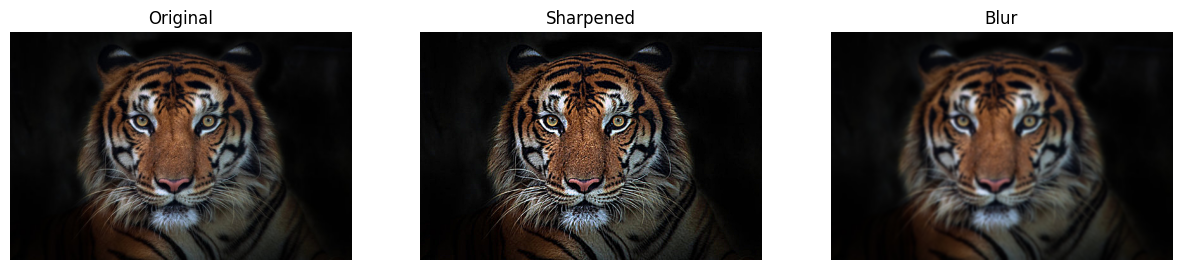

In [65]:
def sharpen_image(image, kernel_size=(7, 7), gamma=2):
    blur = cv2.GaussianBlur(image, kernel_size, 0)
    sharpened = cv2.addWeighted(image, 1 + gamma, blur, -gamma, 0)
    return sharpened, blur

image = cv2.imread("assets/tiger.jpg")
if image is not None:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    sharpened_img, blur = sharpen_image(image_rgb)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(sharpened_img)
    plt.title("Sharpened")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(blur)
    plt.title("Blur")
    plt.axis("off")

    plt.show()
else:
    print("Error: Could not load image.")


# Morphological Edge Detection

- Extract clean object boundaries by subtracting eroded image from its dilated version


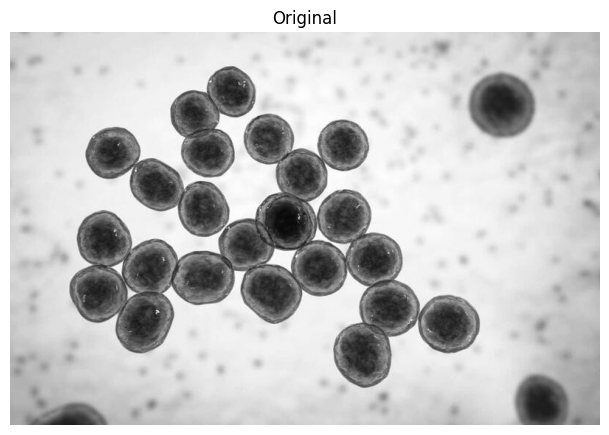

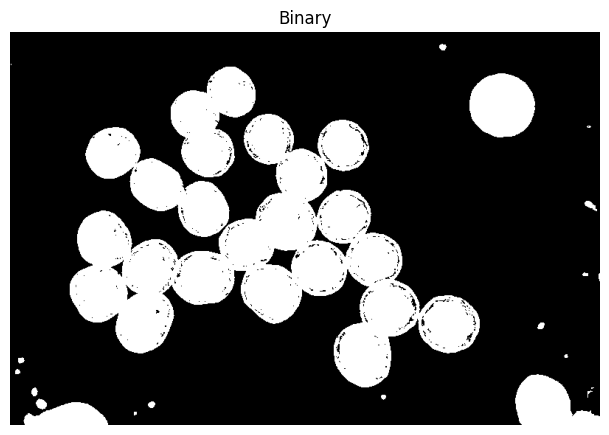

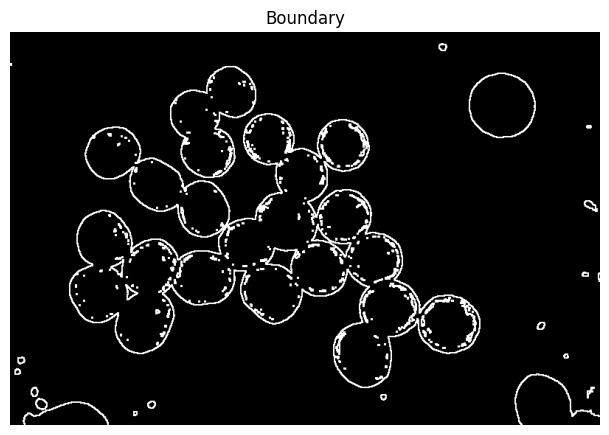

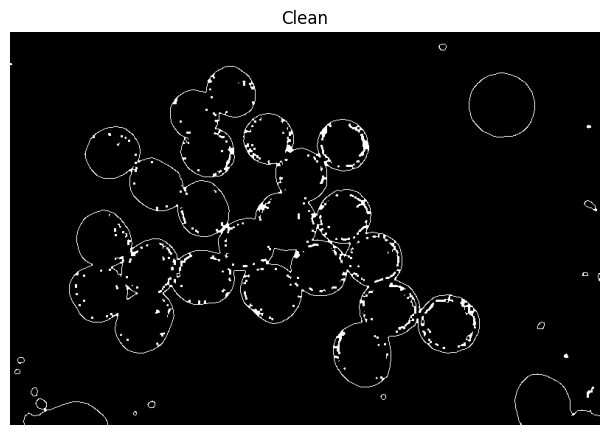

In [66]:
# Read the image
img = cv2.imread("assets/bacteria.jpg", cv2.IMREAD_GRAYSCALE)
# For black and white image:
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary = cv2.bitwise_not(binary)

# TODO: Morphological edge detection (dilate and then erode and then ...)
kernel = np.ones((3, 3), np.uint8)

dilated = cv2.dilate(binary ,kernel ,iterations=1 )
eroded = cv2.erode(binary , kernel, iterations=1 )

boundary = cv2.subtract(dilated, eroded)

edges = cv2.Canny(binary, 100, 200)
cleaned = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)


titles = ["Original", "Binary", "Boundary", "Clean"]
images = [img, binary, boundary, cleaned]

for i in range(4):
    plt.figure(figsize=(35,35))
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()

# Count bacteria



> Add blockquote



bonus:
- find a way to calculate the kernel size automatically (based on overlaps or cell sizes for example)
- reconstruct cells by dilation after counting them

Number of objects detected: 26


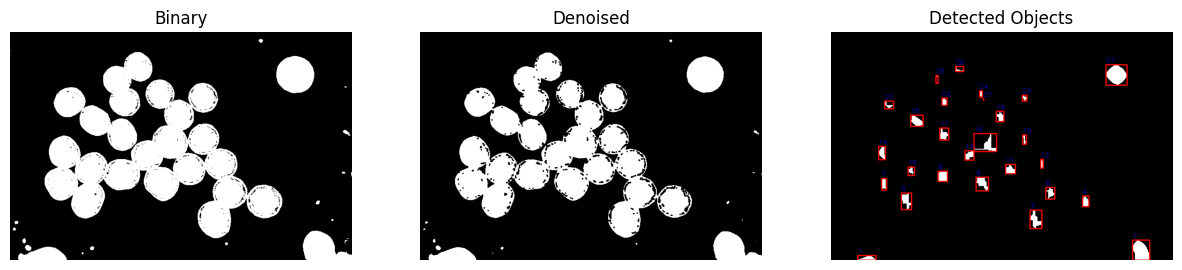

In [67]:
# Load image (grayscale)
img = cv2.imread("assets/bacteria.jpg", cv2.IMREAD_GRAYSCALE)

# Otsu thresholding
# For black and white image:
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Flip the colors (for morphology)
binary = cv2.bitwise_not(binary)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
denoised = cv2.erode(binary , kernel, iterations=1 )


kernel = np.ones((32, 32), np.uint8)
eroded = cv2.erode(denoised , kernel, iterations=1 )

contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of objects detected:", len(contours)-1)


img_boxes = cv2.cvtColor(eroded, cv2.COLOR_GRAY2BGR)
for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img_boxes, (x, y), (x + w, y + h), (255, 0, 0), 2)  
    cv2.putText(img_boxes, str(i+1), (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)

plt.figure(figsize=(15, 7))
plt.subplot(1,3,1)
plt.imshow(binary, cmap="gray")
plt.title("Binary")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(denoised, cmap="gray")
plt.title("Denoised")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_boxes)
plt.title("Detected Objects")
plt.axis("off")

plt.show()

# Optional



> Learn as much as you want about CNNs and ask mentors (CNNs will be taught in future sessions)



# Sources:
- Computer Vision: Algorithms and Applications
- Dr. Karimi videos
- Google
- My own knowledge